In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

1. AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
2. AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
3. AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
4. AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
5. AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
6. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
7. Complain - 1 if customer complained in the last 2 years
8. DtCustomer - date of customer’s enrolment with the company
9. Education - customer’s level of education
10. Marital - customer’s marital status
11. Kidhome - number of small children in customer’s household
12.  Teenhome - number of teenagers in customer’s household
13.  Income - customer’s yearly household income
14. MntFishProducts - amount spent on fish products in the last 2 years
15. MntMeatProducts - amount spent on meat products in the last 2 years
16. MntFruits - amount spent on fruits products in the last 2 years
17. MntSweetProducts - amount spent on sweet products in the last 2 years
18. MntWines - amount spent on wine products in the last 2 years
19. MntGoldProds - amount spent on gold products in the last 2 years
20. NumDealsPurchases - number of purchases made with discount
21. NumCatalogPurchases - number of purchases made using catalogue
22. NumStorePurchases - number of purchases made directly in stores
23. NumWebPurchases - number of purchases made through company’s web site
24. NumWebVisitsMonth - number of visits to company’s web site in the last month
25. Recency - number of days since the last purchase

In [2]:
data = pd.read_csv('marketing_campaign.csv')
pd.set_option('display.max_columns', None) #To show all columns on dataset

In [3]:
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
data.describe().T

count          mean           std     min       25%  \
ID                   2240.0   5592.159821   3246.662198     0.0   2828.25   
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   
Income               2216.0  52247.251354  25173.076661  1730.0  35303.00   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
AcceptedCmp3         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp4         2240.0      0.074554      0.262728     0.0      0.00   
AcceptedCmp5         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.00   
AcceptedCmp2         2240.0      0.013393      0.114976     0.0      0.00   
Complain             2240.0      0.009375      0.096391     0.0      0.00   
Z_CostContact        2240.0      3.000000      0.000000     3.0      3.00   
Z_Revenue            2240.0     11.000000      0.000000    11.0     11.00   
Response             2240.0      0.149107      0.356274     0.0      0.00   

                         50%       75%       max  
ID                    5458.5   8427.75   11191.0  
Year_Birth            1970.0   1977.00    1996.0  
Income               51381.5  68522.00  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Z_CostContact            3.0      3.00       3.0  
Z_Revenue               11.0     11.00      11.0  
Response                 0.0      0.00       1.0

In [6]:
data.drop(columns=["Dt_Customer"],inplace=True)

In [7]:
data.Income=data.Income.astype(float)

In [8]:
data.columns = data.columns.str.replace(' ', '')

In [45]:
data[["Income"]].isnull().sum()

Income    0
dtype: int64

In [10]:
data.Income=data.Income.fillna(data["Income"].mean())

In [11]:
pd.isnull(data[["Income"]]).sum()

Income    0
dtype: int64

In [12]:
noofchildren=['Kidhome','Teenhome']
data['totalChildren']=data[noofchildren].sum(axis=1)
data['totalChildren']

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: totalChildren, Length: 2240, dtype: int64

In [13]:
from datetime import datetime, date 
data["Age"]=date.today().year-data["Year_Birth"]
data["Age"]

0       68
1       71
2       60
3       41
4       44
        ..
2235    58
2236    79
2237    44
2238    69
2239    71
Name: Age, Length: 2240, dtype: int64

In [14]:
spending=["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]
data["totalspending"]=data[spending].sum(axis=1)
data["totalspending"]

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: totalspending, Length: 2240, dtype: int64

In [15]:
purchases=["NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases"]
data["totalpurchases"]=data[purchases].sum(axis=1)
data["totalpurchases"]

0       25
1        6
2       21
3        8
4       19
        ..
2235    18
2236    22
2237    19
2238    23
2239    11
Name: totalpurchases, Length: 2240, dtype: int64

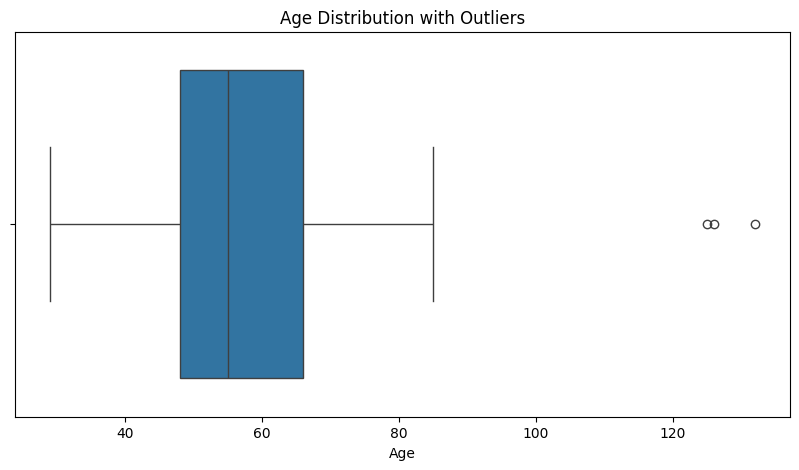

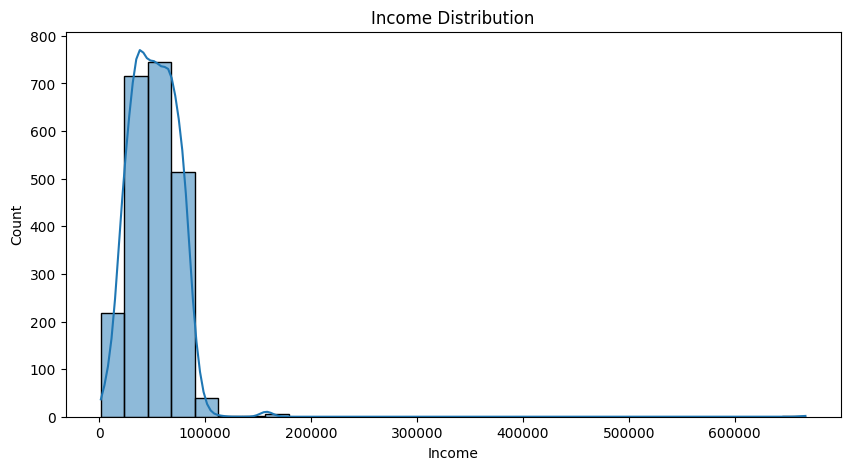

In [16]:
# EDA - Visualizations
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['Age'])
plt.title('Age Distribution with Outliers')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(data['Income'], bins=30, kde=True)
plt.title('Income Distribution')
plt.show()

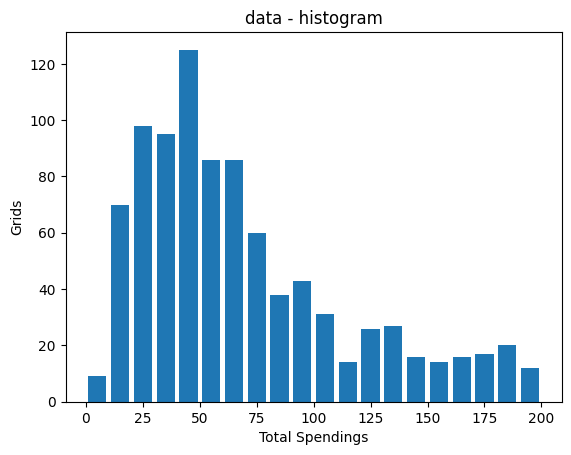

In [17]:
bins = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
plt.hist(data["totalspending"],bins,histtype='bar', rwidth=0.8)

plt.xlabel('Total Spendings')
plt.ylabel('Grids')
plt.title('data - histogram')
plt.show()

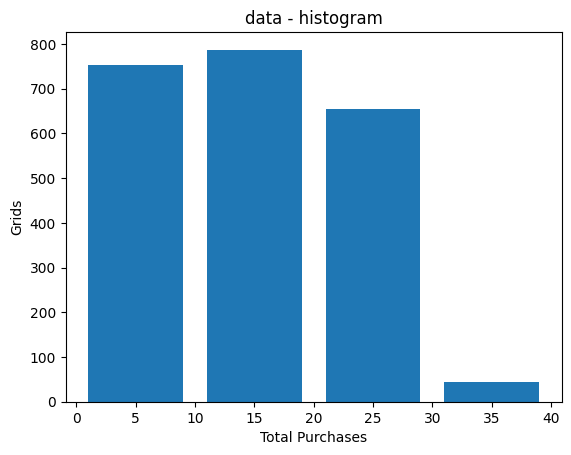

In [18]:
bins = [0,10,20,30,40,]
plt.hist(data["totalpurchases"],bins,histtype='bar', rwidth=0.8)

plt.xlabel('Total Purchases')
plt.ylabel('Grids')
plt.title('data - histogram')
plt.show()

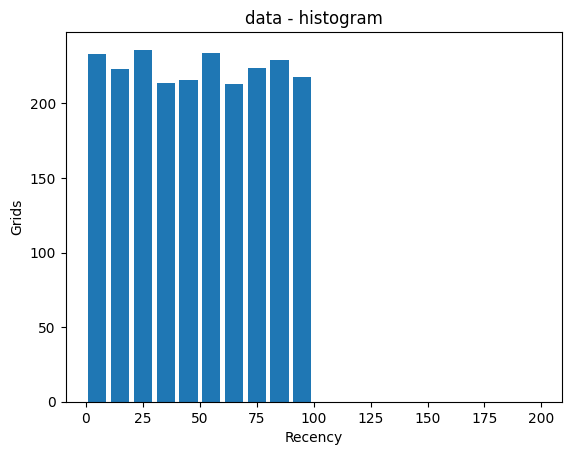

In [19]:
bins = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
plt.hist(data['Recency'],bins,histtype='bar', rwidth=0.8)

plt.xlabel('Recency')
plt.ylabel('Grids')
plt.title('data - histogram')
plt.show()

In [20]:
# Outlier Treatment
z_scores = np.abs(stats.zscore(data[['Income', 'totalspending']]))
data = data[(z_scores < 3).all(axis=1)]

In [42]:
data.shape

(2227, 32)

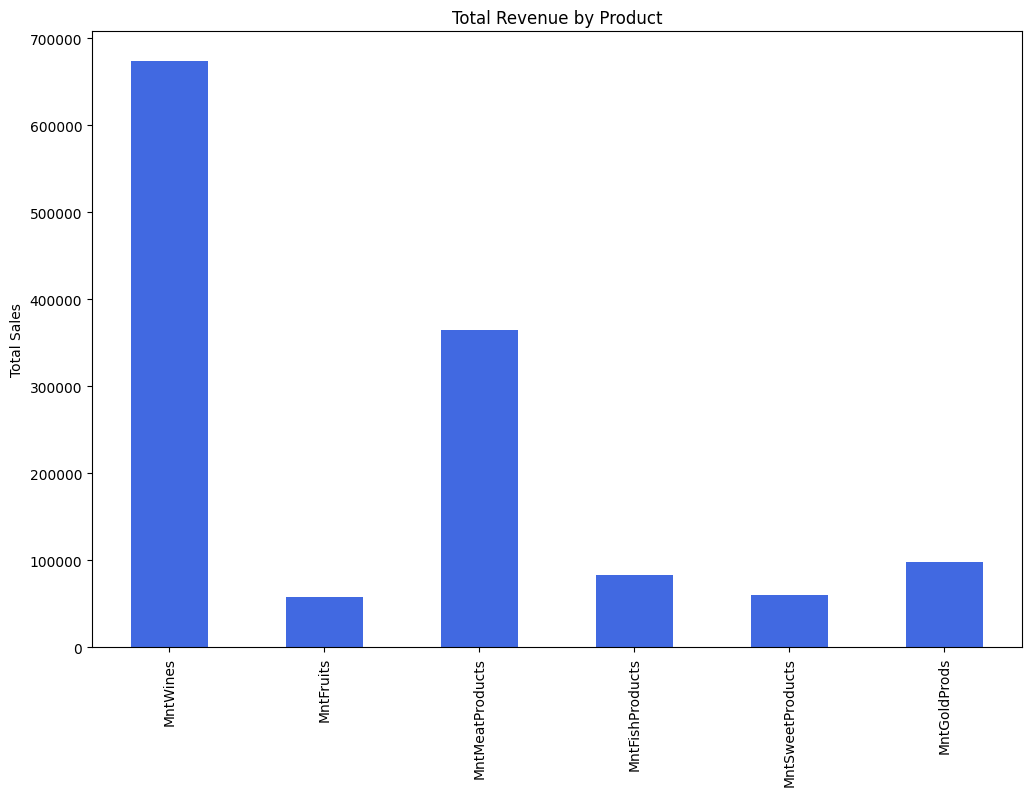

In [22]:
#Identify the top-performing products and those with the lowest revenue.
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
product_sales = data[product_columns].sum()
plt.figure(figsize=(12, 8))
product_sales.plot(kind='bar', color='royalblue')
plt.title('Total Revenue by Product')
plt.ylabel('Total Sales')
plt.show()

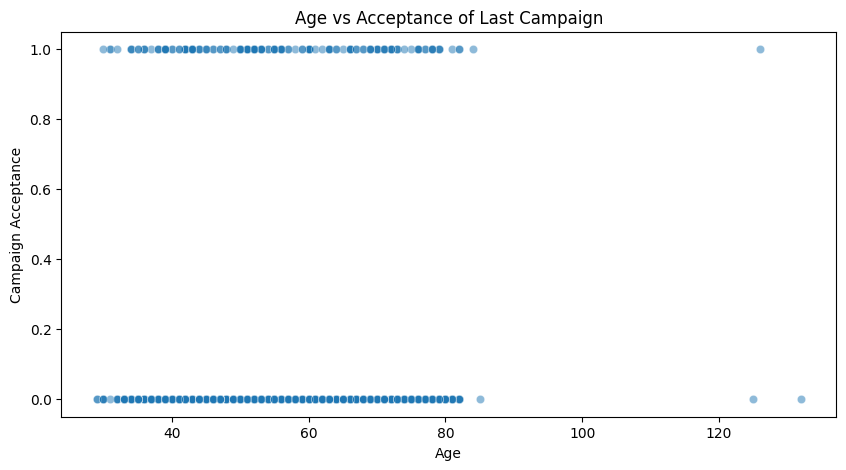

In [23]:
# Correlation between age and campaign acceptance
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data['Age'], y=data['AcceptedCmp5'], alpha=0.5)
plt.title('Age vs Acceptance of Last Campaign')
plt.xlabel('Age')
plt.ylabel('Campaign Acceptance')
plt.show()

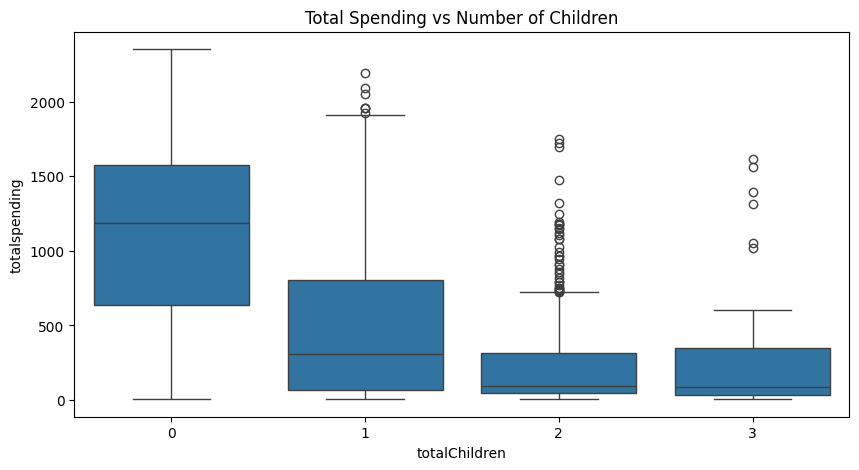

In [24]:
# Relationship between number of children and total spending
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['totalChildren'], y=data['totalspending'])
plt.title('Total Spending vs Number of Children')
plt.show()

In [25]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'totalChildren',
       'Age', 'totalspending', 'totalpurchases'],
      dtype='object')

In [26]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
data[["Education","Marital_Status"]]=oe.fit_transform(data[["Education","Marital_Status"]])

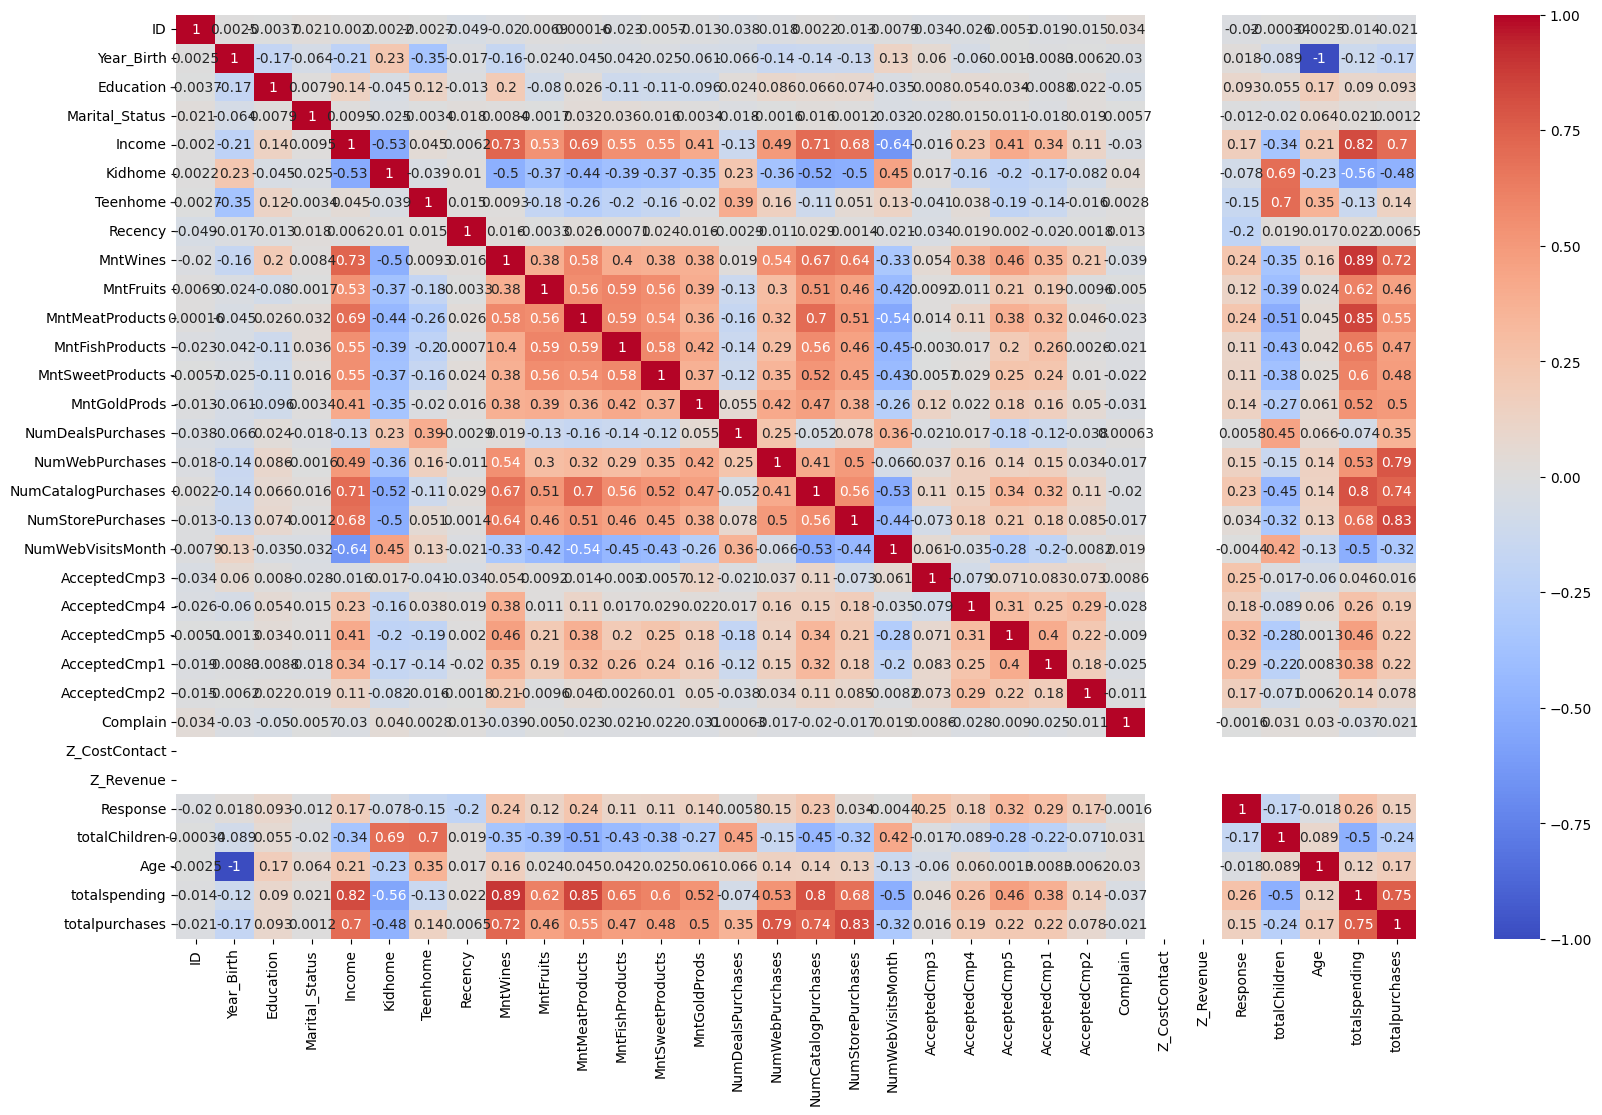

In [27]:
plt.figure(figsize=(20, 12))
numeric_cols = data.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_cols.corr(), annot=True, vmin=-1, cmap='coolwarm')
plt.show()

In [28]:
from lightgbm import LGBMClassifier #pip install lightgbm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
# Feature importance
X = data.drop(columns=["Response"])
y = data['Response']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [31]:
# Create LightGBM Classifier
lgb_model = LGBMClassifier(
    boosting_type='gbdt', #gbdt - traditional Gradient Boosting Decision Tree
    objective='binary',
    n_estimators=100,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

In [32]:
# Train the Model
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 265, number of negative: 1516
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2138
[LightGBM] [Info] Number of data points in the train set: 1781, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.148793 -> initscore=-1.744101
[LightGBM] [Info] Start training from score -1.744101
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

LGBMClassifier(learning_rate=0.05, max_depth=5, objective='binary',
               random_state=42)

In [33]:
# Make Predictions
y_pred = lgb_model.predict(X_test)
y_prob = lgb_model.predict_proba(X_test)

In [34]:
# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8789237668161435

Confusion Matrix:
 [[368  12]
 [ 42  24]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       380
           1       0.67      0.36      0.47        66

    accuracy                           0.88       446
   macro avg       0.78      0.67      0.70       446
weighted avg       0.86      0.88      0.86       446



In [35]:
# Feature Importance (Very Important for Teaching)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': lgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance.head(20))

                Feature  Importance
7               Recency         187
10      MntMeatProducts         125
18    NumWebVisitsMonth         107
4                Income         106
13         MntGoldProds          96
0                    ID          91
8              MntWines          87
17    NumStorePurchases          79
12     MntSweetProducts          73
3        Marital_Status          68
9             MntFruits          67
19         AcceptedCmp3          57
11      MntFishProducts          55
16  NumCatalogPurchases          52
2             Education          40
29        totalspending          34
22         AcceptedCmp1          30
28                  Age          29
15      NumWebPurchases          29
6              Teenhome          26


In [36]:
fi = feature_importance.sort_values(by='Importance', ascending=False)
fi['cum_importance'] = fi['Importance'].cumsum() / fi['Importance'].sum()
fi[fi['cum_importance'] <= 0.95]

Feature  Importance  cum_importance
7               Recency         187        0.118130
10      MntMeatProducts         125        0.197094
18    NumWebVisitsMonth         107        0.264687
4                Income         106        0.331649
13         MntGoldProds          96        0.392293
0                    ID          91        0.449779
8              MntWines          87        0.504738
17    NumStorePurchases          79        0.554643
12     MntSweetProducts          73        0.600758
3        Marital_Status          68        0.643714
9             MntFruits          67        0.686039
19         AcceptedCmp3          57        0.722047
11      MntFishProducts          55        0.756791
16  NumCatalogPurchases          52        0.789640
2             Education          40        0.814908
29        totalspending          34        0.836387
22         AcceptedCmp1          30        0.855338
28                  Age          29        0.873658
15      NumWebPurchases          29        0.891977
6              Teenhome          26        0.908402
1            Year_Birth          26        0.924826
14    NumDealsPurchases          25        0.940619

In [37]:
#Typical choices:
# Top 10 → small dataset

# Top 15–20 → medium dataset

# Top 30 → large dataset

In [38]:
#fi[fi['Importance'] > 0]
# Importance ≈ 0 → ignore

# Importance very small and unstable across runs → ignore

In [39]:
# Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, lgb_model.feature_importances_)
plt.xlabel("Importance Score")
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()

In [41]:
sample = X_test[:10]
prediction = lgb_model.predict(sample)
probability = lgb_model.predict_proba(sample)

print("Predicted Class:", prediction)
print("Prediction Probability:", probability)

Predicted Class: [0 0 0 0 1 0 0 0 0 0]
Prediction Probability: [[0.98935494 0.01064506]
 [0.98437483 0.01562517]
 [0.89582272 0.10417728]
 [0.9694203  0.0305797 ]
 [0.31946192 0.68053808]
 [0.72631039 0.27368961]
 [0.6459649  0.3540351 ]
 [0.95615969 0.04384031]
 [0.97784741 0.02215259]
 [0.9858028  0.0141972 ]]
